## Notebook for vizualing the raw, non-simulated data.
Useful for...

In [1]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.io as sio
import sklearn as sk
from sklearn.grid_search import ParameterGrid
from sklearn import decomposition
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import datetime
import pickle
import os
from cycling_rnn import *

## Plot settings

In [3]:
# Set the color map: RdBu is nice. Let's take the first and last two colors of ('RdBu',5)
cmap = sns.color_palette('RdBu',5)[:2] + sns.color_palette('RdBu',5)[-2:]
sns.set_palette(cmap)
sns.set_context('paper', font_scale=1.5)

In [4]:
# Load data
monkey = 'D'

if monkey == 'D':
    data = sio.loadmat('/Users/jeff/Documents/Python/_projects/cyclingRNN/drakeFeb_processed.mat')
    data2 = sio.loadmat('/Users/jeff/Documents/Python/_projects/cyclingRNN/drakeFeb.mat') # data2 just for getting kinematics
else:
    data = sio.loadmat('/Users/jeff/Documents/Python/_projects/cyclingRNN/cousFeb_processed.mat')
    data2 = sio.loadmat('/Users/jeff/Documents/Python/_projects/cyclingRNN/cousFeb.mat')
    
emg = data['EMG']
m1 = data['M1']

kin = data2['D'][0,0]['KIN']
kin = np.reshape(kin.mean(-1), kin.shape[:2]+(4,))
kin = np.transpose(kin, [1, 2, 0])
print kin.shape
# 0 hp
# 1 hv
# 2 tq
# 3 vp
# 4 vv
# 5 w

(5092, 4, 6)


In [5]:
time_axis, inds1, inds2 = get_time_axis(data2['D'][0,0]['KIN'])

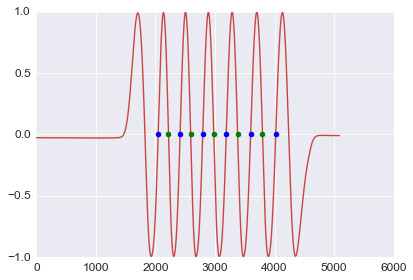

In [6]:
# Sanity check on get_time_axis function
plt.plot(kin[:,0,0])
plt.plot([inds1], 0, 'bo')
plt.plot([inds2], 0, 'go')
#plt.plot([time_inds], 0, 'ko')
plt.show()

In [7]:
m1_k = np.zeros(m1.shape[:-1])
emg_k = np.zeros(emg.shape[:-1])
for c in range(4):
    m1_k[:,c] = get_curvature(m1[:,c,:])
    emg_k[:,c] = get_curvature(emg[:,c,:])

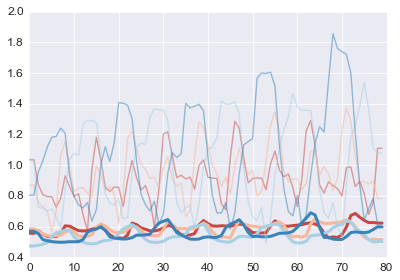

In [8]:
plt.plot(m1_k, linewidth=3)
plt.plot(emg_k, alpha=0.5)
plt.show()

## EMG plot

In [9]:
emg.shape

(80, 4, 36)

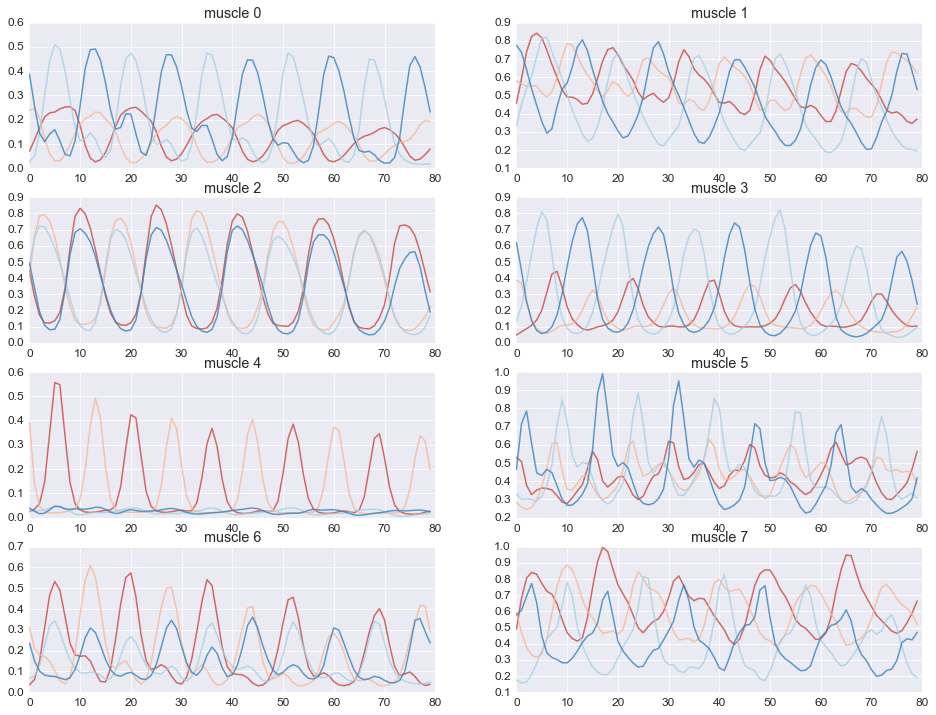

In [10]:
rows = 4
cols = 2

with sns.color_palette(n_colors=4):
    f, ax = plt.subplots(rows,cols, figsize=(16, 12))
    for i in range(rows):
        for j in range(cols):
            muscle = np.ravel_multi_index((i,j), (rows,cols))
            ax[i,j].plot(emg[:,:,muscle], linewidth=1.5, alpha=.8)
            ax[i,j].set_title('muscle '+str(muscle))
#f.suptitle(cur_params, fontsize=16)
plt.show()

## blah

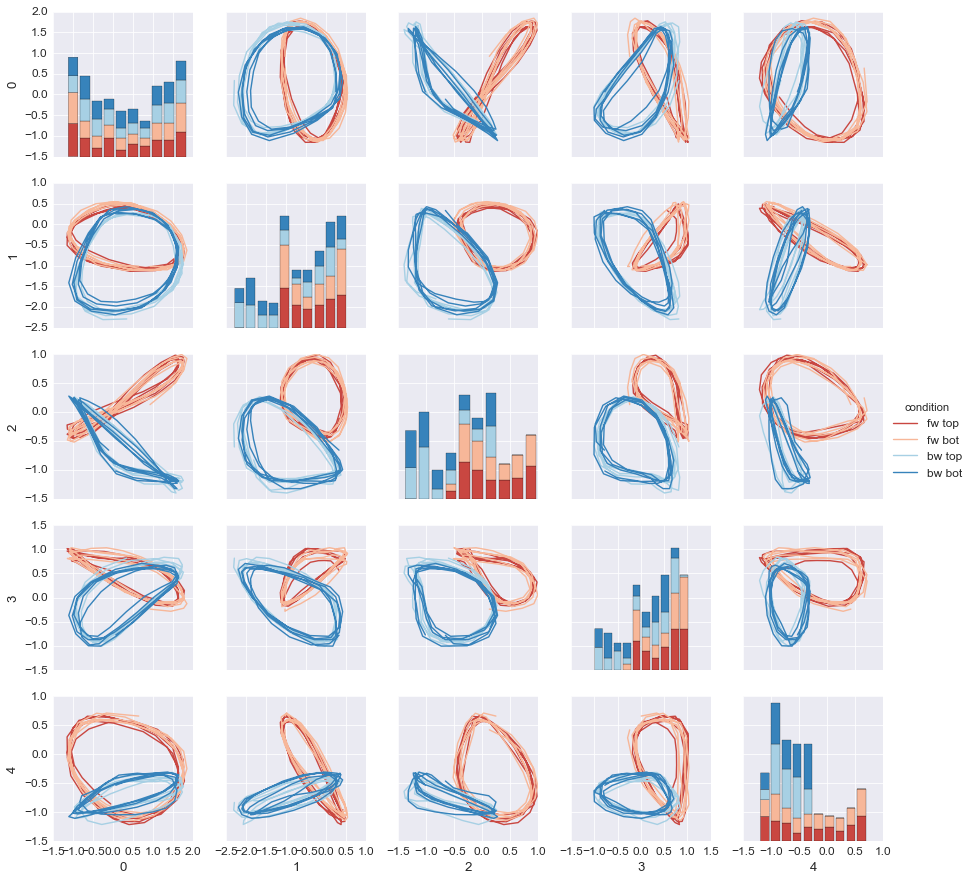

In [12]:
# Plot PCs
pca_x = sk.decomposition.PCA(n_components=5)
pca_x.fit(np.concatenate([m1[:,i,:] for i in range(4)]))
f = make_pairgrid([np.dot(m1[:,i,:], pca_x.components_.T) for i in range(4)])
#f.fig.suptitle(cur_params)

In [ ]:
#plot pcs
pca_x = sk.decomposition.PCA(n_components=5)
pca_x.fit(np.concatenate([emg[:,i,:] for i in range(4)]))
f = make_pairgrid([np.dot(emg[:,i,:], pca_x.components_.T) for i in range(4)])
#f.fig.suptitle(cur_params)